# Regressão Linear: Implementação e Explicação

Este notebook demonstra a implementação de um modelo de Regressão Linear para prever o peso (`Weight`) de uma pessoa com base em outras características.

## O que é Regressão Linear?

A Regressão Linear é um algoritmo de aprendizado de máquina supervisionado que modela a relação entre uma variável dependente (alvo) e uma ou mais variáveis independentes (preditoras), ajustando uma equação linear aos dados.

O objetivo é encontrar os **pesos** (ou coeficientes) da equação linear. Usaremos a notação **w** para os pesos.

A equação para a Regressão Linear Múltipla é:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n + \epsilon$$

Onde:
- $y$ é a variável dependente (o que queremos prever).
- $x_1, x_2, ..., x_n$ são as variáveis independentes (nossos recursos).
- $w_0$ é o intercepto (também chamado de *bias*). É o valor de $y$ quando todas as variáveis independentes são 0.
- $w_1, w_2, ..., w_n$ são os pesos que indicam a importância de cada recurso.
- $\epsilon$ é o erro do modelo.

Em notação vetorial, a equação pode ser escrita como:

$$y = Xw + \epsilon$$

Nosso objetivo é encontrar o vetor de pesos **w** que melhor ajusta o modelo aos dados, minimizando o erro.

### Import de bibliotecas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Carregando e Explorando os Dados

Primeiro, vamos carregar o conjunto de dados do arquivo `data_0460_5832.csv` e dar uma olhada nas primeiras linhas para entender sua estrutura e seus dados.

In [29]:
# A função pd.read_csv() lê o arquivo e o carrega em um DataFrame do pandas.
df = pd.read_csv('data_0460_5832.csv')

# O comando .head() mostra as 5 primeiras linhas do DataFrame.
print("Primeiras 5 linhas do dataset:")
print(df.head())

# O comando .info() mostra um resumo técnico, incluindo os tipos de cada coluna.
print('\nInformações do DataFrame:')
df.info()

Primeiras 5 linhas do dataset:
      Sex  Age  Height  Weight  Shoe number
0  Female   53     154      59           36
1    Male   23     170      56           40
2  Female   23     167      63           37
3    Male   21     178      78           40
4  Female   25     153      58           36

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          257 non-null    object
 1   Age          257 non-null    int64 
 2   Height       257 non-null    int64 
 3   Weight       257 non-null    int64 
 4   Shoe number  257 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.2+ KB


## 2. Preparação dos Dados

Antes de treinar nosso modelo, precisamos preparar os dados. Isso envolve:

1.  **Lidar com variáveis categóricas**: A coluna `Sex` é categórica ('Male'/'Female'). Os modelos de regressão linear requerem entradas numéricas. Usaremos uma técnica chamada *one-hot encoding* para converter essa coluna em colunas numéricas (0s e 1s).
2.  **Definir Features (X) e Target (y)**: Separaremos nosso conjunto de dados em:
    * `X`: a matriz de features (as variáveis que usaremos para fazer a previsão).
    * `y`: o vetor alvo (a variável que queremos prever, neste caso, `Weight`).

In [30]:
# A função pd.get_dummies() converte variáveis categóricas em variáveis dummy/indicadoras.
# drop_first=True remove a primeira categoria para evitar multicolinearidade (redundância).
# Neste caso, teremos uma coluna 'Sex_Male'. Se for 1, é homem; se for 0, é mulher.
df_processed = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# X recebe todas as colunas, exceto a coluna 'Weight' (nosso alvo).
X = df_processed.drop('Weight', axis=1)

# y recebe apenas a coluna 'Weight'.
y = df_processed['Weight']

# Imprimimos as primeiras linhas de X e y para verificar o resultado.
print('Features (X) - 5 primeiras linhas:')
print(X.head())

print('\nTarget (y) - 5 primeiras linhas:')
print(y.head())

Features (X) - 5 primeiras linhas:
   Age  Height  Shoe number  Sex_Male
0   53     154           36     False
1   23     170           40      True
2   23     167           37     False
3   21     178           40      True
4   25     153           36     False

Target (y) - 5 primeiras linhas:
0    59
1    56
2    63
3    78
4    58
Name: Weight, dtype: int64


## 3. Resolvendo a Regressão Linear com a Equação Normal

Uma maneira de encontrar os pesos ótimos ($w$) é usando a **Equação Normal**. Esta é uma solução analítica que minimiza a função de custo diretamente.

A fórmula da Equação Normal é:

$$w = (X^T X)^{-1} X^T y$$

Onde:
- $X^T$ é a transposta da matriz de features.
- $(X^T X)^{-1}$ é a inversa do produto da transposta de X por X.
- $y$ é o vetor de valores alvo.

**Importante**: A matriz $X$ que usamos nesta fórmula precisa incluir o termo de intercepto ($w_0$). Para fazer isso, vamos adicionar uma coluna de 1s no início da nossa matriz de features `X`.

In [31]:
# Adicionando uma coluna de 1s no início de X para o termo de intercepto (w0).
# np.c_ é um atalho do NumPy para concatenar arrays por colunas.
X_b = np.c_[np.ones((X.shape[0], 1)), X.values]

# Calculando os pesos 'w' usando a Equação Normal: w = inv(X^T * X) * X^T * y
# np.linalg.inv() calcula a inversa da matriz
# .T transpõe a matriz
# .dot() realiza a multiplicação de matrizes
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Exibindo os pesos encontrados
print('Pesos (w) encontrados com a Equação Normal:')
feature_names = ['Intercepto (w0)'] + X.columns.tolist()
for name, weight in zip(feature_names, w_best):
    print(f'{name}: {weight}')

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [15]:
# Criar uma nova coluna numérica para o sexo
df['Sex_numeric'] = df['Sex'].map({'Female': 0, 'Male': 1})

# Exibir as primeiras linhas para ver a nova coluna
df.head()

Sex  Age  Height  Weight  Shoe number  Sex_numeric
0  Female   53     154      59           36            0
1    Male   23     170      56           40            1
2  Female   23     167      63           37            0
3    Male   21     178      78           40            1
4  Female   25     153      58           36            0

### Modelagem dos dataset no pytorch

In [16]:
# 1. Selecionar as colunas e converter para arrays NumPy
X_reg = df[['Height']].values
y_reg = df[['Weight']].values

# 2. Converter os arrays para tensores do PyTorch
X_reg_tensor = torch.from_numpy(X_reg.astype('float32'))
y_reg_tensor = torch.from_numpy(y_reg.astype('float32'))

### Implementação da regressao Linear

In [17]:
# Definir o modelo de regressão linear
model_reg = nn.Linear(1, 1)

# Definir a função de custo (Loss) e o otimizador
learning_rate = 0.0001
criterion_reg = nn.MSELoss()
optimizer_reg = torch.optim.SGD(model_reg.parameters(), lr=learning_rate)

### Treinamento do modelo


In [18]:
num_epochs = 2000
print("Iniciando o treinamento do modelo de Regressão Linear...")

for epoch in range(num_epochs):
    # Forward pass: obter predições
    outputs = model_reg(X_reg_tensor)
    loss = criterion_reg(outputs, y_reg_tensor)
    
    # Backward pass: calcular gradientes e atualizar pesos
    optimizer_reg.zero_grad() # Limpar gradientes antigos
    loss.backward()           # Calcular novos gradientes
    optimizer_reg.step()        # Atualizar os pesos do modelo
    
    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Treinamento concluído!")

Iniciando o treinamento do modelo de Regressão Linear...
Epoch [200/2000], Loss: nan
Epoch [400/2000], Loss: nan
Epoch [600/2000], Loss: nan
Epoch [800/2000], Loss: nan
Epoch [1000/2000], Loss: nan
Epoch [1200/2000], Loss: nan
Epoch [1400/2000], Loss: nan
Epoch [1600/2000], Loss: nan
Epoch [1800/2000], Loss: nan
Epoch [2000/2000], Loss: nan
Treinamento concluído!


### Visualizando os Resultados

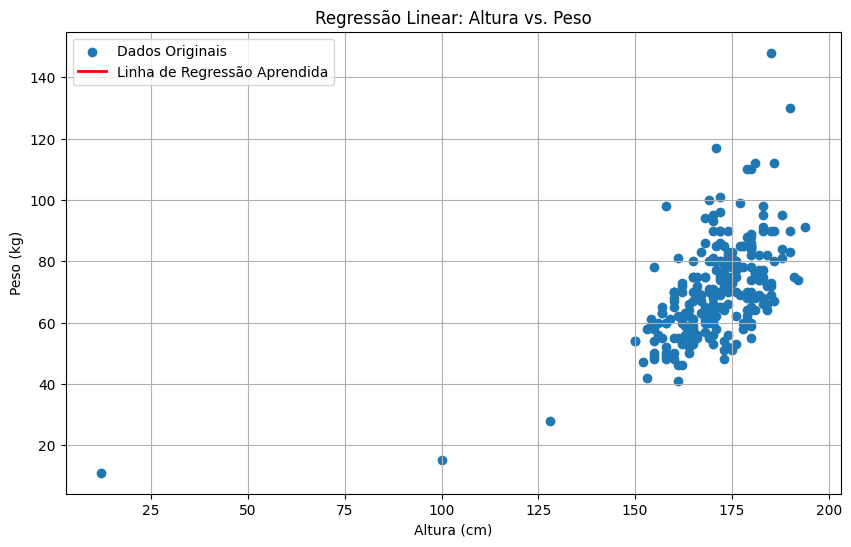

In [19]:
# Desabilitar o cálculo de gradientes para fazer a predição
predicted = model_reg(X_reg_tensor).detach().numpy()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, label='Dados Originais')
plt.plot(X_reg, predicted, color='red', linewidth=2, label='Linha de Regressão Aprendida')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Regressão Linear: Altura vs. Peso')
plt.legend()
plt.grid(True)
plt.show()

# Regressão Linear: Implementação e Explicação

Este notebook demonstra a implementação de um modelo de Regressão Linear para prever o peso (`Weight`) de uma pessoa com base em outras características, como altura, idade, sexo e número do sapato.

## O que é Regressão Linear?

A Regressão Linear é um algoritmo de aprendizado de máquina supervisionado que modela a relação entre uma variável dependente (alvo) e uma ou mais variáveis independentes (preditoras), ajustando uma equação linear aos dados.

A equação para a Regressão Linear Múltipla é:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

Onde:
- $y$ é a variável dependente (o que queremos prever).
- $x_1, x_2, ..., x_n$ são as variáveis independentes (nossos recursos).
- $\beta_0$ é o intercepto (o valor de $y$ quando todas as variáveis independentes são 0).
- $\beta_1, \beta_2, ..., \beta_n$ são os coeficientes de regressão (o "peso" de cada recurso).
- $\epsilon$ é o erro do modelo.

Em notação vetorial, a equação pode ser escrita como:

$$y = X\beta + \epsilon$$

Nosso objetivo é encontrar os melhores valores para os coeficientes $\beta$ que minimizem o erro.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Carregando e Explorando os Dados

Primeiro, vamos carregar o conjunto de dados e dar uma olhada nas primeiras linhas para entender sua estrutura.

In [24]:
# Certifique-se de que o arquivo 'data_0460_5832.csv' está na mesma pasta que o notebook
df = pd.read_csv('data_0460_5832.csv')

print("Primeiras 5 linhas do dataset:")
print(df.head())

print('\nInformações do DataFrame:')
df.info()

print('\nEstatísticas Descritivas:')
print(df.describe())

Primeiras 5 linhas do dataset:
      Sex  Age  Height  Weight  Shoe number
0  Female   53     154      59           36
1    Male   23     170      56           40
2  Female   23     167      63           37
3    Male   21     178      78           40
4  Female   25     153      58           36

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          257 non-null    object
 1   Age          257 non-null    int64 
 2   Height       257 non-null    int64 
 3   Weight       257 non-null    int64 
 4   Shoe number  257 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.2+ KB

Estatísticas Descritivas:
              Age      Height      Weight  Shoe number
count  257.000000  257.000000  257.000000   257.000000
mean    28.478599  170.206226   70.377432    39.494163
std     13.310319   14.472235   16.145141   

## 2. Preparação dos Dados

Antes de treinar nosso modelo, precisamos preparar os dados. Isso envolve:

1.  **Lidar com variáveis categóricas**: A coluna `Sex` é categórica ('Male'/'Female'). Os modelos de regressão linear requerem entradas numéricas. Usaremos a técnica de *one-hot encoding* para converter essa coluna em colunas numéricas.
2.  **Definir Features (X) e Target (y)**: Separaremos nosso conjunto de dados em `X` (as variáveis que usaremos para fazer a previsão) e `y` (a variável que queremos prever, neste caso, `Weight`).

In [25]:
# Convertendo a coluna 'Sex' para variáveis dummy (one-hot encoding)
# drop_first=True remove a multicolinearidade, já que Sex_Male=1 implica que a pessoa não é Female
df_processed = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Definindo as features (X) e o target (y)
X = df_processed.drop('Weight', axis=1)
y = df_processed['Weight']

print('Features (X) - 5 primeiras linhas:')
print(X.head())

print('\nTarget (y) - 5 primeiras linhas:')
print(y.head())

Features (X) - 5 primeiras linhas:
   Age  Height  Shoe number  Sex_Male
0   53     154           36     False
1   23     170           40      True
2   23     167           37     False
3   21     178           40      True
4   25     153           36     False

Target (y) - 5 primeiras linhas:
0    59
1    56
2    63
3    78
4    58
Name: Weight, dtype: int64


## 3. Resolvendo a Regressão Linear com a Equação Normal

Uma maneira de encontrar os coeficientes ótimos ($\beta$) é usando a **Equação Normal**. Esta é uma solução analítica que encontra o mínimo da função de custo de uma só vez.

A fórmula da Equação Normal é:

$$\beta = (X^T X)^{-1} X^T y$$

Onde:
- $X^T$ é a transposta da matriz de features.
- $(X^T X)^{-1}$ é a inversa do produto da transposta de X por X.

**Importante**: Para que o termo de intercepto ($\beta_0$) seja calculado, precisamos adicionar uma coluna de 1s à nossa matriz de features `X`.

In [27]:
# Adicionando uma coluna de 1s para o intercepto
X_b = np.c_[np.ones((X.shape[0], 1)), X.values]

# Calculando os coeficientes beta usando a Equação Normal
# np.linalg.inv() calcula a inversa da matriz
# .T transpõe a matriz
# .dot() realiza a multiplicação de matrizes
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print('Coeficientes encontrados com a Equação Normal:')
feature_names = ['Intercepto'] + X.columns.tolist()
for name, coef in zip(feature_names, beta_best):
    print(f'{name}: {coef}')

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'